# Data Preparation

In [2]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [3]:
# read in the data / create df
path = "Resources/crypto_data.csv"
raw_df = pd.read_csv(path)
raw_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# discard all rows not being traded
traded_df = raw_df.loc[raw_df['IsTrading'] == True]
# drop 'IsTrading' column
alltraded_df = traded_df.drop(['IsTrading'], axis = 1)

In [6]:
# remove all rows with null values 
nonull_df = alltraded_df.dropna()

In [8]:
# remove all coins that have not been mined (total coins mined greater than 0)
mined_df = nonull_df.loc[nonull_df['TotalCoinsMined']>1]
mined_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [9]:
# remove CoinName column 
name_df = mined_df.drop(['CoinName', 'Unnamed: 0'], axis = 1)
name_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [11]:
# create dummy variables for Algorithm & ProofType
cleaned_df = pd.concat(
    [name_df, pd.get_dummies(name_df['Algorithm']), 
    pd.get_dummies(name_df['ProofType'])], 
    axis =1 ).drop(
        ['Algorithm', 'ProofType'], 
        axis = 1)
cleaned_df.head()

,TotalCoinsMined,TotalCoinSupply,1GB AES Pattern Search,536,Argon2d,BLAKE256,Blake,Blake2S,Blake2b,C11,...,PoW/PoS,PoW/PoS,PoW/PoW,PoW/nPoS,Pos,Proof of Authority,Proof of Trust,TPoS,Zero-Knowledge Proof,dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# scale the data
scaler = StandardScaler().fit(cleaned_df)
scaling_df = scaler.transform(cleaned_df)
scaled_df = pd.DataFrame(scaling_df, columns=cleaned_df.columns)
scaled_df

,TotalCoinsMined,TotalCoinSupply,1GB AES Pattern Search,536,Argon2d,BLAKE256,Blake,Blake2S,Blake2b,C11,...,PoW/PoS,PoW/PoS,PoW/PoW,PoW/nPoS,Pos,Proof of Authority,Proof of Trust,TPoS,Zero-Knowledge Proof,dPoW/PoW
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.123317,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
528,-0.116781,-0.149176,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
529,-0.095613,-0.132179,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
530,-0.116948,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


# Dimensionality Reduction

In [21]:
# dependency for PCA
from sklearn.decomposition import PCA
# PCE to reduce dimensions
# initialize
pca = PCA(n_components=.90)
# prinicipal components for the data
crypto_pca = pca.fit_transform(scaled_df)
# check number of columns (features): 
len(crypto_pca[0])

74

We see that the number of features goes from 98 to 74.

In [22]:
# create df with PCA data
pca_df = pd.DataFrame(data=crypto_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-2.210782e-16,-6.883168e-16,2.282140e-15,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,7.921450e-17,-1.120989e-15,2.525930e-15,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,8.752073e-15,-2.234103e-14,-6.428405e-14,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-2.655003e-15,-1.002527e-14,-1.523596e-14,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-6.843734e-14,-1.448754e-13,-7.952353e-14,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,5.053451e-15,-2.187479e-11,-3.479650e-15,-0.851713,2.041159,3.560713,...,-2.195073e-16,-1.245385e-14,-1.888369e-14,1.081083e-14,-2.442418e-15,-1.163756e-14,1.668646e-14,2.036505e-14,-1.004832e-14,-3.803161e-15
528,-0.333144,1.032071,-0.590740,0.001399,8.834849e-15,3.721725e-12,-1.705276e-14,-0.007154,-1.320125,-0.052460,...,1.090840e-16,-7.745678e-16,1.846190e-15,-3.955569e-15,1.021953e-15,6.766213e-16,-1.874161e-15,-4.328686e-15,5.496276e-15,1.153312e-16
529,0.324349,-2.312308,0.421515,-0.001319,-5.674971e-15,-3.506871e-12,1.223719e-14,0.017309,0.161077,-0.047787,...,-1.977146e-14,-6.881003e-14,-5.028111e-14,1.778927e-14,4.078607e-14,1.826705e-14,4.864731e-14,4.926964e-14,2.745325e-14,1.569680e-15
530,-0.149364,-2.049336,0.412968,-0.001745,-6.510239e-15,-4.640471e-12,1.293676e-14,0.028954,0.544389,0.233373,...,-2.962943e-15,1.174696e-15,1.497439e-17,2.456472e-17,-1.957688e-15,1.116332e-15,1.132027e-15,3.635332e-15,-4.697815e-16,1.175227e-15


In [24]:
# dependeny for tSNE
from sklearn.manifold import TSNE
# furher reduction with tSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

We see that the number of features has now been reduced to 2.

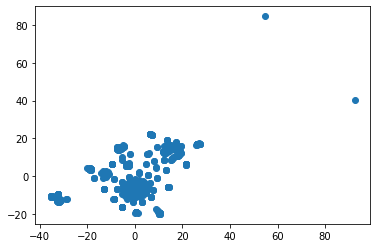

In [26]:
# create a scatter plot of the t-SNE output & Observe whether there are distinct clusters or not
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

The t-SNE visual appears to show about 4 distinct clusters, along with a few outliers.

In [27]:
# create df with t-SNE data
tsne_df=pd.DataFrame(data=tsne_features)
tsne_df

,0,1
0,11.848245,12.548846
1,18.521341,11.076962
2,25.659615,16.560812
3,-31.615345,-12.382544
4,-8.946430,-12.165235
...,...,...
527,-29.005199,-12.336108
528,17.483778,14.280524
529,9.954396,-19.685177
530,0.582915,-18.743774


# Cluster Analysis with k-Means

In [28]:
# dependency for k-Means
from sklearn.cluster import KMeans

k_model = KMeans(n_clusters=4, random_state=5)
k_model.fit(crypto_pca)

KMeans(n_clusters=4, random_state=5)

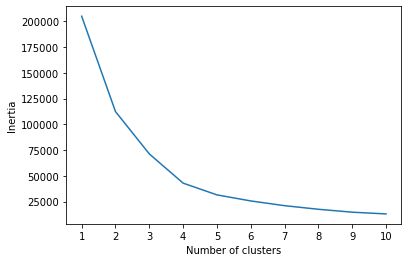

In [32]:
# create elbow plot to determine inertia 
inertia = []
k = 11
for i in range(1,k):
        k_model = KMeans(n_clusters=i, random_state=10)
        k_model.fit(tsne_df)
        inertia.append(k_model.inertia_)

inertia
plt.plot(range(1,k), inertia)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

It seems k = 4 is the best fit choice it is the clearest "elbow".

# Recommendation

Based on my findings, I would tell my clients that yes cryptocurrencies can be clustered together, although of course there will always be outliers. The optimal number of clusters for cryptocurrencies is 4. Although I could also suggest including a 5th cluster to account for outliers